In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
from utils.kf_emulator import KalmanFilterWithEmulator
from kalman_filter_giessen import KFGiessenSETUP

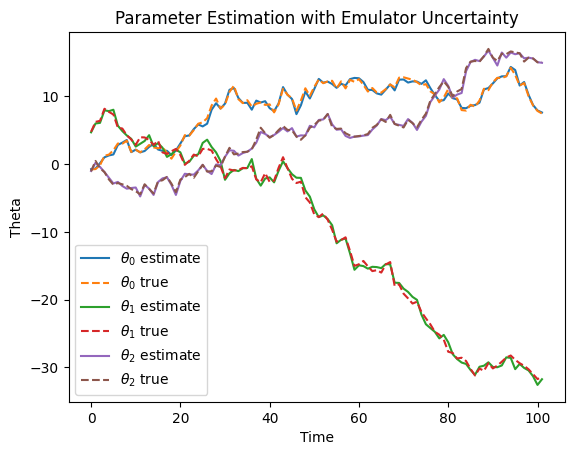

In [2]:
n_params = 3
n_obs = 5
T = 102

np.random.seed(0)

B = np.random.randn(n_obs, n_params)
B_0 = np.random.randn(n_obs) * 0.5

Q = np.eye(n_params) * 1.0
R = np.eye(n_obs) * 0.2
Sigma_emu = np.diag(np.random.uniform(0.1, 0.3, size=n_obs))

mu_0 = np.zeros(n_params)
Sigma_0 = np.eye(n_params) * 10

kf = KalmanFilterWithEmulator(B, B_0, Q, R, Sigma_emu, mu_0, Sigma_0)

# Simulate "true" theta trajectory
theta_true = np.zeros((T, n_params))
theta_true[0] = np.random.multivariate_normal(mu_0, Sigma_0)
for t in range(1, T):
    theta_true[t] = theta_true[t-1] + np.random.multivariate_normal(np.zeros(n_params), Q)

# Generate observations
Y = np.array([
    B @ theta_true[t] + B_0 + np.random.multivariate_normal(np.zeros(n_obs), Sigma_emu + R)
    for t in range(T)
])

# Run the filter
estimates = kf.run(Y)

# Plot
import matplotlib.pyplot as plt
posterior_means = np.array([mu for mu, _ in estimates])
for i in range(n_params):
    plt.plot(posterior_means[:, i], label=f"$\\theta_{i}$ estimate")
    plt.plot(theta_true[:, i], '--', label=f"$\\theta_{i}$ true")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Theta")
plt.title("Parameter Estimation with Emulator Uncertainty")
plt.show()

In [3]:
B.shape, B_0.shape, R.shape, Sigma_emu.shape, mu_0.shape, Sigma_0.shape, type(np.array(Y)), Y.shape

((5, 3), (5,), (5, 5), (5, 5), (3,), (3, 3), numpy.ndarray, (102, 5))

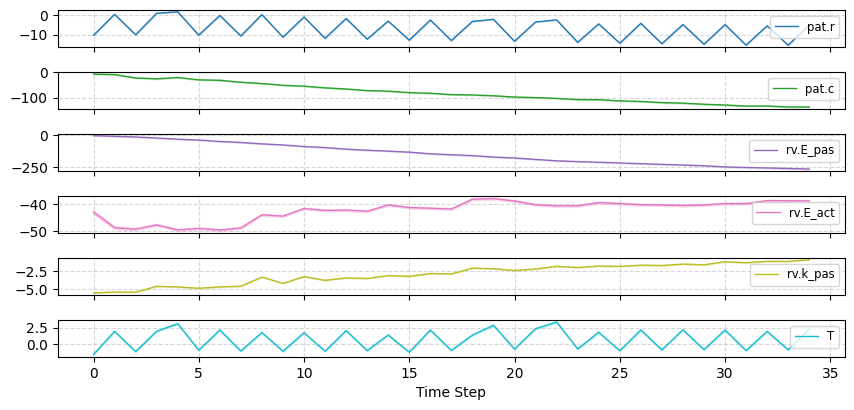

In [4]:
#- F: Transition matrix is identitity (not included)
#- B: (n_obs x n_params) emulator linear coefficient matrix
#- B_0: (n_obs,) emulator intercept vector
#- Q: (n_params x n_params) state transition covariance (process noise)
#- R: (n_obs x n_obs) observation noise covariance
#- Sigma_emu: (n_obs x n_obs) emulator uncertainty covariance (diagonal from emulator RSEs)
#- mu_0: (n_params,) prior mean of theta
#- Sigma_0: (n_params x n_params) prior covariance of theta 

n_samples = 64
n_params = 6
output_path = "../CohortDataRaw3/output_real/pat_4"
emulator_path = "../output_synthetic/"
output_keys = [  "a_epad",
      "epad",
      "s_a_epad",
      "s_epad",
      "min_dpdt",
      "max_dpdt",
      "cross_max",
      "A_p",
      "P_max",
      "esp",
      "sys",
      "EF",
      "dia",
      "Ees/Ea",
      "edp",
      "eivc",
      "iT" ]
               
include_timeseries = False
epsilon_obs_scale = 0.05

estimates  = KFGiessenSETUP(n_samples=n_samples,
    n_params=n_params,
    output_path=output_path,
    emulator_path=emulator_path,
    output_keys=output_keys,
    include_timeseries=include_timeseries,
    epsilon_obs_scale=epsilon_obs_scale)
